In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/333333/secondary_data-1.csv


In [96]:
df=pd.read_csv('../input/333333/secondary_data-1.csv', encoding='ISO-8859-1')
df4=pd.read_csv('../input/333333/secondary_data-1.csv', encoding='ISO-8859-1')

df.info

<bound method DataFrame.info of       ï»¿class  cap-diameter cap-shape cap-surface cap-color  \
0            p         15.26         x           g         o   
1            p         16.60         x           g         o   
2            p         14.07         x           g         o   
3            p         14.17         f           h         e   
4            p         14.64         x           h         o   
...        ...           ...       ...         ...       ...   
61064        p          1.18         s           s         y   
61065        p          1.27         f           s         y   
61066        p          1.27         s           s         y   
61067        p          1.24         f           s         y   
61068        p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN    

In [97]:
df['cap-diameter'][1] 

16.6

In [98]:
# df.loc[0, 'cap-diameter'] = 15.26
# df.head()

In [99]:
dropd = df[['cap-diameter','stem-height', 'stem-width']]
df2 = df.drop(['cap-diameter','stem-height', 'stem-width', 'cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color'],axis=1)
# 'cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color'

In [100]:
df = df2.astype('category')
df.dtypes

ï»¿class                category
cap-shape               category
cap-color               category
does-bruise-or-bleed    category
gill-color              category
stem-color              category
has-ring                category
habitat                 category
season                  category
dtype: object

In [101]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [102]:
df=df.join(dropd)

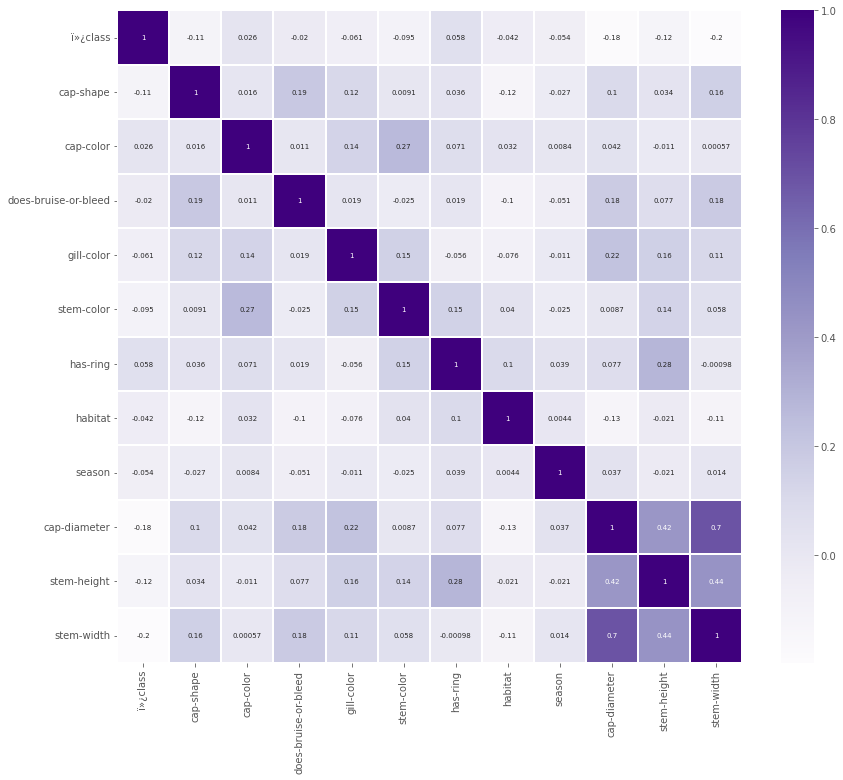

In [103]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

In [104]:
X = df.drop(['ï»¿class'], axis=1)
y = df['ï»¿class']
print(y[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

1


In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=50,random_state=42)
print('n_estimators: ',rf.n_estimators)
print('n_max_depth: ',rf.max_depth)
print('max_features: ',rf.max_features)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

n_estimators:  100
n_max_depth:  50
max_features:  auto
Test Accuracy: 99.51%


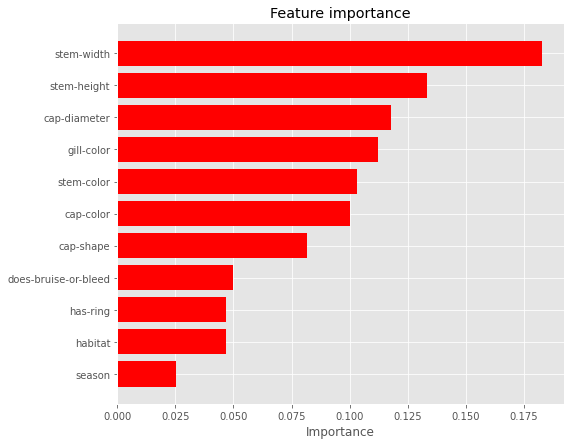

In [106]:
features_list = X.columns.values
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [107]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      8108
           1       1.00      1.00      1.00     10213

    accuracy                           1.00     18321
   macro avg       1.00      1.00      1.00     18321
weighted avg       1.00      1.00      1.00     18321



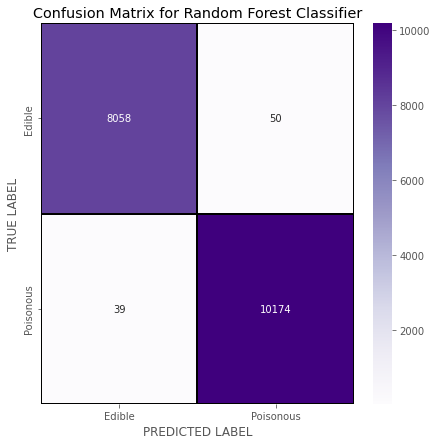

In [108]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [109]:
# df.loc[0, 'cap-diameter'] = 15.26
df.head()

,ï»¿class,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-color,has-ring,habitat,season,cap-diameter,stem-height,stem-width
0,1,6,6,0,10,11,1,0,3,15.26,16.95,17.09
1,1,6,6,0,10,11,1,0,2,16.60,17.99,18.19
2,1,6,6,0,10,11,1,0,3,14.07,17.80,17.74
3,1,2,1,0,10,11,1,0,3,14.17,15.77,15.98
4,1,6,6,0,10,11,1,0,3,14.64,16.53,17.20


In [110]:
df4.info

<bound method DataFrame.info of       ï»¿class  cap-diameter cap-shape cap-surface cap-color  \
0            p         15.26         x           g         o   
1            p         16.60         x           g         o   
2            p         14.07         x           g         o   
3            p         14.17         f           h         e   
4            p         14.64         x           h         o   
...        ...           ...       ...         ...       ...   
61064        p          1.18         s           s         y   
61065        p          1.27         f           s         y   
61066        p          1.27         s           s         y   
61067        p          1.24         f           s         y   
61068        p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN    

In [112]:
stemwidth = float(input("stem-width를 입력하세요: "))
df4.loc[0, 'stem-width'] = stemwidth
stemheight = float(input("stem-height를 입력하세요: "))
df4.loc[0, 'stem-height'] = stemheight
capdiameter = float(input("cap-diameter를 입력하세요: "))
df4.loc[0, 'cap-diameter'] = capdiameter
gillcolor = input("gill-color를 입력하세요:")
df4.loc[0, 'gill-color'] = gillcolor
stemcolor = input("stem-color를 입력하세요: ")
df4.loc[0, 'stem-color'] = stemcolor
capcolor = input("cap-color를 입력하세요: ")
df4.loc[0, 'cap-color'] = capcolor
capshape = input("cap-shape를 입력하세요: ")
df4.loc[0, 'cap-shape'] = capshape
doesbruiseorbleed = input("does-bruise-or-bleed를 입력하세요: ")
df4.loc[0, 'does-bruise-or-bleed'] = doesbruiseorbleed
hasring = input("has-ring를 입력하세요: ")
df4.loc[0, 'has-ring'] = hasring
habitat = input("habitat를 입력하세요: ")
df4.loc[0, 'habitat'] = habitat
season = input("season를 입력하세요: ")
df4.loc[0, 'season'] = season

# print(stemwidth)
# print(stemheight)
# print(capdiameter)
# print(gillcolor)
# print(stemcolor)
# print(capcolor)
# print(capshape)
# print(doesbruiseorbleed)
# print(hasring)
# print(habitat)
# print(season)

stem-width를 입력하세요:  9.8
stem-height를 입력하세요:  15.4
cap-diameter를 입력하세요:  11.4
gill-color를 입력하세요: w
stem-color를 입력하세요:  w
cap-color를 입력하세요:  n
cap-shape를 입력하세요:  x
does-bruise-or-bleed를 입력하세요:  t
has-ring를 입력하세요:  f
habitat를 입력하세요:  d
season를 입력하세요:  s


In [113]:
dropd = df4[['cap-diameter','stem-height', 'stem-width']]
df3 = df4.drop(['cap-diameter','stem-height', 'stem-width', 'cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color'],axis=1)
# 'cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color'

In [114]:
df = df3.astype('category')
df.dtypes

ï»¿class                category
cap-shape               category
cap-color               category
does-bruise-or-bleed    category
gill-color              category
stem-color              category
has-ring                category
habitat                 category
season                  category
dtype: object

In [115]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [116]:
df=df.join(dropd)
X = df.drop(['ï»¿class'], axis=1)

In [119]:
print(X)

       cap-shape  cap-color  does-bruise-or-bleed  gill-color  stem-color  \
0              6          5                     1          10          11   
1              6          6                     0          10          11   
2              6          6                     0          10          11   
3              2          1                     0          10          11   
4              6          6                     0          10          11   
...          ...        ...                   ...         ...         ...   
61064          5         11                     0           2          12   
61065          2         11                     0           2          12   
61066          5         11                     0           2          12   
61067          2         11                     0           2          12   
61068          5         11                     0           2          12   

       has-ring  habitat  season  cap-diameter  stem-height  stem-width  
0

In [118]:
y_pred_rf = rf.predict(X)
if (y_pred_rf[0] == 0):
    print("식용 가능한 버섯입니다")
else:
    print("식용 불가능한 독버섯입니다")

식용 가능한 버섯입니다
